In [44]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm
import statsmodels.formula.api as smf
from os.path import dirname, abspath

In [45]:
# 读取数据
path = os.path.join(dirname(os.getcwd()), 'training_set')
all_files = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and os.path.join(path, f).endswith('_target.csv')]
df_from_each_file = (pd.read_csv(f, names=["city","brand","gender","new_car_price","road_haul","use_date","displacement","follow","transfer","service_price","flaw","price"]) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
drop_duplicates = concatenated_df.drop_duplicates()
drop_na = drop_duplicates.dropna(how='any')
guazi = drop_na.reset_index(drop=True)

In [46]:
# 计算保值率
guazi["hedge_ratio"] = (guazi["price"] / guazi["new_car_price"])*100
nona = guazi
nona

,city,brand,gender,new_car_price,road_haul,use_date,displacement,follow,transfer,service_price,flaw,price,hedge_ratio
0,bj,斯柯达昕锐,1,11.5,1.0,0.90,1.6,27,0,3500,3,7.08,61.565217
1,bj,雪铁龙世嘉,1,13.2,10.7,7.00,1.6,61,0,3500,7,3.50,26.515152
2,bj,奥迪Q7,2,108.3,3.1,7.60,3.6,33,0,12400,1,31.00,28.624192
3,bj,雪铁龙世嘉,1,13.2,6.6,7.11,2.0,15,0,3500,2,3.18,24.090909
4,bj,福特福克斯,1,12.9,14.4,6.11,1.8,37,0,3500,9,3.40,26.356589
5,bj,奇瑞瑞虎,1,9.7,2.6,3.90,1.6,21,0,3500,4,4.20,43.298969
6,bj,雪铁龙世嘉,1,13.8,7.8,4.60,2.0,23,1,3500,0,5.41,39.202899
7,bj,大众帕萨特,1,26.0,6.2,5.60,1.8,75,0,4932,3,12.33,47.423077
8,bj,奥迪A6L,2,67.1,9.8,6.70,2.8,53,0,6600,1,16.50,24.590164
9,bj,大众桑塔纳志俊,1,10.8,6.2,7.60,1.8,33,0,3000,10,2.80,25.925926


In [47]:
# 相关性计算
corr=nona.corr("pearson")
corr

,gender,new_car_price,road_haul,use_date,displacement,follow,transfer,service_price,flaw,price,hedge_ratio
gender,1.000000,0.030824,-0.059743,0.026549,-0.012120,0.009955,-0.024225,0.027359,-0.015697,0.033012,-0.000103
new_car_price,0.030824,1.000000,0.073919,0.046849,0.725169,0.075430,0.130908,0.903063,-0.116725,0.910204,0.008008
road_haul,-0.059743,0.073919,1.000000,0.702373,0.180837,-0.109260,0.216133,-0.086274,0.220608,-0.106678,-0.657832
use_date,0.026549,0.046849,0.702373,1.000000,0.129213,-0.029555,0.283419,-0.132358,0.208474,-0.172083,-0.844213
displacement,-0.012120,0.725169,0.180837,0.129213,1.000000,0.028579,0.116696,0.615702,-0.074111,0.641521,-0.012678
follow,0.009955,0.075430,-0.109260,-0.029555,0.028579,1.000000,-0.010220,0.069652,-0.051975,0.075396,0.021025
transfer,-0.024225,0.130908,0.216133,0.283419,0.116696,-0.010220,1.000000,0.048964,0.000843,0.043497,-0.249369
service_price,0.027359,0.903063,-0.086274,-0.132358,0.615702,0.069652,0.048964,1.000000,-0.139132,0.990997,0.221472
flaw,-0.015697,-0.116725,0.220608,0.208474,-0.074111,-0.051975,0.000843,-0.139132,1.000000,-0.161319,-0.234893
price,0.033012,0.910204,-0.106678,-0.172083,0.641521,0.075396,0.043497,0.990997,-0.161319,1.000000,0.275644


In [48]:
# OLS Regression Results: 使用年限 - 保值率
X = nona.use_date
Y = nona.hedge_ratio
X=sm.add_constant(X)
est=sm.OLS(Y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hedge_ratio   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 1.656e+06
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        10:22:13   Log-Likelihood:            -2.3585e+06
No. Observations:              667477   AIC:                         4.717e+06
Df Residuals:                  667475   BIC:                         4.717e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.5136      0.020   3791.976      0.000      75.475      75.553
use_date      -6.2510      0.005  -1286.764      0.000      -6.261      -6.242
==============================================================================
Omnibus:                    35466.369   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108310.830
Skew:                          -0.237   Prob(JB):                         0.00
Kurtosis:                       4.915   Cond. No.                         8.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

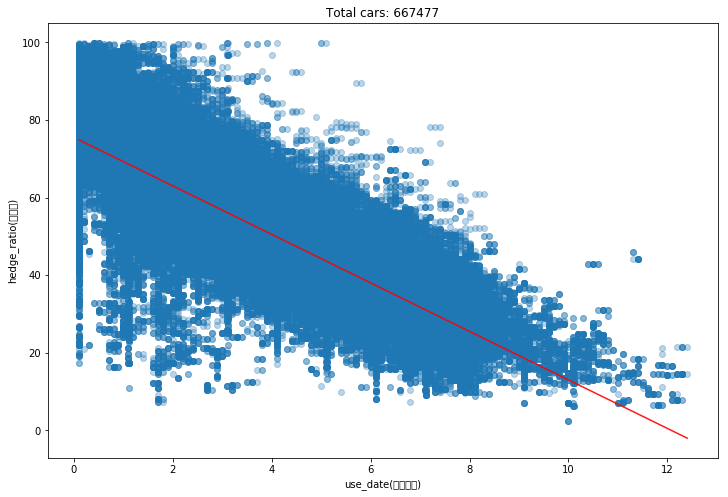

In [49]:
X_prime=np.linspace(X.use_date.min(), X.use_date.max(),100)[:,np.newaxis]
X_prime=sm.add_constant(X_prime)
Y_hat=est.predict(X_prime)
plt.scatter(X.use_date, Y, alpha=0.3) # 画出原始数据
plt.xlabel("use_date(使用年限)")
plt.ylabel("hedge_ratio(保值率)")
plt.title("Total cars: {}".format(len(nona)))
plt.plot(X_prime[:,1], Y_hat, 'r', alpha=0.9) # 添加回归线，红色
plt.show()

In [50]:
# 数据标准化
tensor_no_z_score = nona.loc[:, ['gender','new_car_price','road_haul','use_date','displacement','follow','transfer','service_price','flaw','hedge_ratio']]
tensor = (tensor_no_z_score - tensor_no_z_score.mean())/tensor_no_z_score.std()
tensor

,gender,new_car_price,road_haul,use_date,displacement,follow,transfer,service_price,flaw,hedge_ratio
0,-0.437534,-0.463509,-1.253870,-1.258697,-0.430116,-0.565712,-0.460290,-0.407798,0.211265,0.524242
1,-0.437534,-0.396080,1.580413,1.663142,-0.430116,-0.020453,-0.460290,-0.407798,1.761257,-1.743096
2,2.284723,3.375959,-0.640262,1.950536,3.425249,-0.469490,-0.460290,1.291369,-0.563731,-1.606665
3,-0.437534,-0.396080,0.382417,1.715831,0.340957,-0.758157,-0.460290,-0.407798,-0.176233,-1.899917
4,-0.437534,-0.407979,2.661531,1.236841,-0.044580,-0.405342,-0.460290,-0.407798,2.536253,-1.753353
5,-0.437534,-0.534904,-0.786360,0.178273,-0.430116,-0.661935,-0.460290,-0.407798,0.598763,-0.657375
6,-0.437534,-0.372282,0.733050,0.513566,0.340957,-0.629861,1.153803,-0.407798,-0.951229,-0.922344
7,-0.437534,0.111618,0.265539,0.992556,-0.044580,0.204065,-0.460290,-0.134404,0.211265,-0.390592
8,2.284723,1.741806,1.317438,1.519445,1.883103,-0.148750,-0.460290,0.184047,-0.563731,-1.867620
9,-0.437534,-0.491273,0.265539,1.950536,-0.044580,-0.469490,-0.460290,-0.503256,2.923751,-1.781212


step: 0.000000, loss: 2.290795
step: 500.000000, loss: 2.198049
step: 1000.000000, loss: 2.111508
step: 1500.000000, loss: 2.030938
step: 2000.000000, loss: 1.954874
step: 2500.000000, loss: 1.883267
[-0.06914817  1.03559501 -0.43421247  0.9820199  -0.18023351 -1.48442644
 -0.5336785   0.21350003 -1.58942763] -2.4072089601e-05


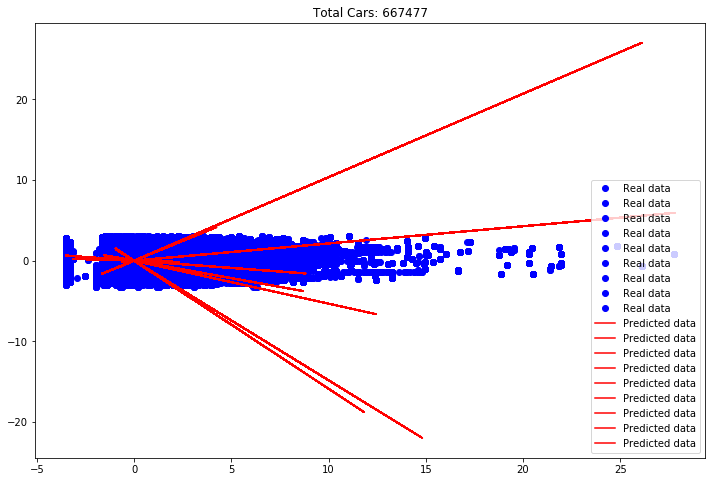

In [51]:
# tensorflow 训练权重
import tensorflow as tf
g = tf.Graph()
with g.as_default():
    xs = tf.placeholder(tf.float64, shape=(None, 9))
    w = tf.Variable(tf.random_normal(shape=[9], dtype=tf.float64))
    b = tf.Variable(0.0, dtype=tf.float64)
    ys = xs * w + b
    ys_ = tf.placeholder(tf.float64, shape=(None, 1))

    loss = tf.reduce_mean(tf.square(ys_ - ys))
    train = tf.train.AdamOptimizer(1e-4).minimize(loss)
    
    
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    test_xs = tensor.iloc[:,:-1]
    test_ys = tensor.iloc[:,-1:]
    
    for step in range(3000):
        batch_ = tensor.sample(n=1000)
        batch_xs = batch_.iloc[:,:-1]
        batch_ys = batch_.iloc[:,-1:]
        sess.run(train, feed_dict={xs: batch_xs, ys_: batch_ys})
        if step % 500 == 0:
            loss_value = sess.run(loss, feed_dict={xs: test_xs, ys_: test_ys})
            print('step: %f, loss: %f' % (step, loss_value))

    w_value, b_value = sess.run([w, b])
    print(w_value, b_value)

X = tensor.iloc[:,:-1]
Y = tensor.iloc[:,-1:]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.title("Total Cars: {0}".format(len(tensor)))
plt.show()

In [52]:
# 预测二手车出售价

In [53]:
# (1)读取出售的二手车
path = os.path.join(dirname(os.getcwd()), 'training_set')
predict_file = os.path.join(dirname(os.getcwd()), 'predict_data', 'predict.csv')
predict = pd.read_csv(predict_file, names=["city","brand","gender","new_car_price","road_haul","use_date","displacement","follow","transfer","service_price","flaw","price"])
predict

,city,brand,gender,new_car_price,road_haul,use_date,displacement,follow,transfer,service_price,flaw,price
0,bj,Jeep指南者,2,28.1,6.2,3.30,2.4,307,0,5664,7,14.16
1,bj,捷豹XF,2,66.2,6.7,3.20,2.0,39,0,11600,4,29.00
2,bj,奥迪A6L,2,44.5,3.7,1.70,2.0,11,0,12600,0,31.50
3,bj,Jeep大切诺基,1,73.4,11.6,3.00,3.6,15,0,14800,1,37.00
4,bj,奔驰C级AMG,1,108.3,6.2,4.00,6.2,7,2,19600,1,49.00
5,bj,现代索纳塔八,1,21.5,7.2,5.11,2.0,53,0,3520,5,8.80
6,bj,路虎神行者2,1,64.9,7.5,3.80,2.0,63,0,11200,7,28.00
7,bj,马自达阿特兹,1,23.4,1.6,1.11,2.5,27,0,6400,6,16.00
8,bj,宝马5系,1,50.9,6.8,7.00,2.5,111,0,6320,8,15.80
9,bj,宝马5系,2,54.2,5.8,3.50,2.0,43,0,12800,4,32.00


In [54]:
# 预测部分的权重，偏移量，均值，标准差
w_value_real = np.array([w_value])
b_value_real = b_value
mean = np.array(tensor_no_z_score.mean())
std = np.array(tensor_no_z_score.std())
w_value_real, b_value_real, mean, std

(array([[-0.06914817,  1.03559501, -0.43421247,  0.9820199 , -0.18023351,
         -1.48442644, -0.5336785 ,  0.21350003, -1.58942763]]),
 -2.4072089601047884e-05,
 array([  1.16072464e+00,   2.31858973e+01,   5.29122262e+00,
          3.52781429e+00,   1.82312604e+00,   6.22753788e+01,
          2.85169377e-01,   5.63598740e+03,   2.45479620e+00,
          5.34611190e+01]),
 array([  3.67342311e-01,   2.52118258e+01,   3.42238202e+00,
          2.08772604e+00,   5.18757537e-01,   6.23556664e+01,
          6.19543062e-01,   5.23786283e+03,   2.58065845e+00,
          1.54586845e+01]))

In [55]:
# 绘画误差曲线

# (1)计算预测值与真实出售价的 误差百分比
nomalization = np.divide(np.subtract(predict.iloc[:,2:-1], mean[:-1]), std[:-1])
forecast_pre = (np.matmul(nomalization, w_value_real.transpose())).transpose()[0]
forecast_flaw = np.add(np.multiply(np.add(forecast_pre, b_value_real), std[-1]), mean[-1])
forecast_price = np.multiply(np.subtract(1, np.divide(forecast_flaw, 100)),predict['new_car_price'].values)
diff = np.divide(np.subtract(forecast_price,predict['price'].values), predict['price'].values)
diff,len(diff)

(array([ 2.61010513, -0.3983506 , -1.0545281 , ...,  0.01117414,
        -0.36956769, -1.42735061]), 41050)

In [56]:
# (2) 计算误差范围累计的二手车数量
labels = np.array(['1%','5%','10%','20%','30%','40%','50%','1','1+'])
scope = np.array([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1,100])
cut = pd.cut(abs(diff), scope, right=False, labels=labels)
percent = cut.value_counts()
percent

1      14326
1%       396
1+      6490
10%     2020
20%     4085
30%     4019
40%     4012
5%      1592
50%     4110
dtype: int64

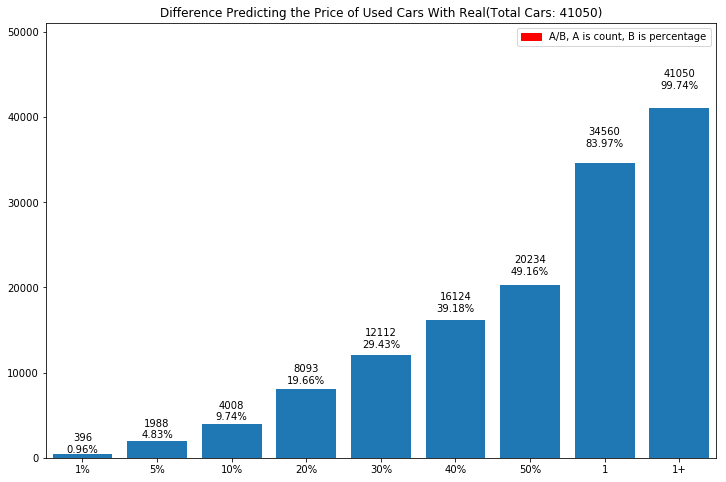

In [57]:
# (3) 预测误差范围的 二手车数量
width = 0.3
ind = np.arange(10)
x = labels
y = np.array([percent['1%'], percent['5%'], percent['10%'], percent['20%'], percent['30%'], percent['40%'], percent['50%'], percent['1'], percent['1+']]).cumsum()

fig, ax = plt.subplots()
rects = ax.bar(range(len(y)), y, width=0.8, align='center')
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.set_ylim(0, y.max()+10000)
ax.set_title('Difference Predicting the Price of Used Cars With Real(Total Cars: {})'.format(len(diff)))
plt.margins(0.01)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{0}\n{1:.2%}'.format(int(height), (height)/41157),
                ha='center', va='bottom')


autolabel(rects)
red_patch = mpatches.Patch(color='red', label='A/B, A is count, B is percentage')
plt.legend(handles=[red_patch])
plt.rcParams["figure.figsize"] = [12.0,8.0]
plt.show()

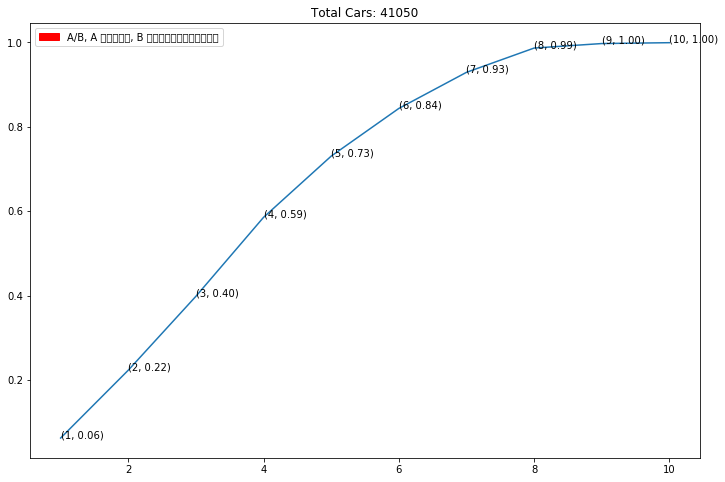

In [58]:
# (4) 二手车出售时间
cut = pd.cut(predict['use_date'], np.arange(11), right=False, labels=np.arange(1,11))
inflection = cut.value_counts()

x = np.arange(1,11)
y = np.divide(inflection.sort_index().cumsum(),len(predict))

red_patch = mpatches.Patch(color='red', label='A/B, A 是使用年限, B 是出售二手车占总量的比例')
plt.legend(handles=[red_patch])
plt.rcParams["figure.figsize"] = [12.0,8.0]
for ab in zip(np.arange(1,11), y): 
    plt.annotate('(%d, %.2f)' % ab, xy=ab, textcoords='data')
plt.title('Total Cars: {}'.format(len(predict)))
plt.plot(x,y)
plt.show()